In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [13]:
# Load the dataset
df = pd.read_csv("vgsales.csv")

# Select numeric sales columns and drop rows with missing values
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sales_data = df[sales_cols].dropna()




In [14]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)
print(scaled_data)

[[50.48050838 57.13692978 11.93805759 44.60608534 52.86402505]
 [35.28443669  6.7941883  21.76729621  3.82822442 25.53250298]
 [19.08427325 25.19778483 12.00272364 17.29711476 22.69002469]
 ...
 [-0.32408584 -0.29020692 -0.25149161 -0.25486439 -0.33919426]
 [-0.32408584 -0.27041811 -0.25149161 -0.25486439 -0.33919426]
 [-0.31184082 -0.29020692 -0.25149161 -0.25486439 -0.33919426]]


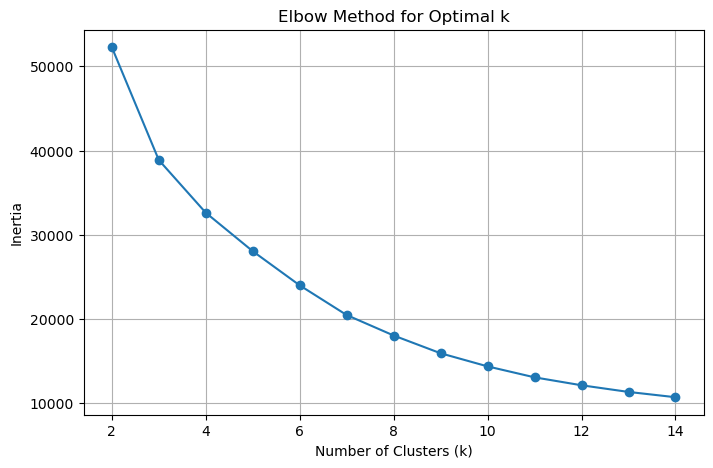

In [15]:

# Use the Elbow Method to choose optimal k
inertias = []
K_RANGE = range(2, 15)
for k in K_RANGE:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_RANGE, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()



In [16]:
# Fit KMeans with the chosen number of clusters (e.g., 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Prepare and show the clustered data
clustered_df = df[['Name', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Cluster']]
print(clustered_df.head(20).to_string(index=False))



                                        Name Platform        Genre  NA_Sales  EU_Sales  JP_Sales  Global_Sales  Cluster
                                  Wii Sports      Wii       Sports     41.49     29.02      3.77         82.74        2
                           Super Mario Bros.      NES     Platform     29.08      3.58      6.81         40.24        3
                              Mario Kart Wii      Wii       Racing     15.85     12.88      3.79         35.82        3
                           Wii Sports Resort      Wii       Sports     15.75     11.01      3.28         33.00        3
                    Pokemon Red/Pokemon Blue       GB Role-Playing     11.27      8.89     10.22         31.37        3
                                      Tetris       GB       Puzzle     23.20      2.26      4.22         30.26        3
                       New Super Mario Bros.       DS     Platform     11.38      9.23      6.50         30.01        3
                                    Wii 

In [17]:
# Optional: Summary table for understanding clusters
summary = clustered_df.groupby('Cluster')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].mean()
print("\nCluster Summary (Average Regional Sales):")
print(summary)


Cluster Summary (Average Regional Sales):
          NA_Sales   EU_Sales  JP_Sales  Global_Sales
Cluster                                              
0         0.169628   0.083749  0.050485      0.331389
1         1.900264   1.279333  0.547256      4.146248
2        41.490000  29.020000  3.770000     82.740000
3         9.297609   5.387609  2.853478     19.397609
